# **Exploratory Data Analysis (EDA):**

In [2]:
import pandas as pd


In [3]:
titanic_train = pd.read_csv('Titanic_train.csv')
titanic_test = pd.read_csv('Titanic_test.csv')

In [4]:
#Calculate the mean of the 'survived' column in the training dataset
mean_survived = titanic_train['Survived'].mean()

#  Create the 'survived' column in the test dataset and fill it with the mean
titanic_test['survived'] = mean_survived

#  Merge the datasets
df = pd.concat([titanic_train, titanic_test], ignore_index=True)

# Display the merged dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,survived
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN


In [5]:
#checking for missing values
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
survived        891
dtype: int64

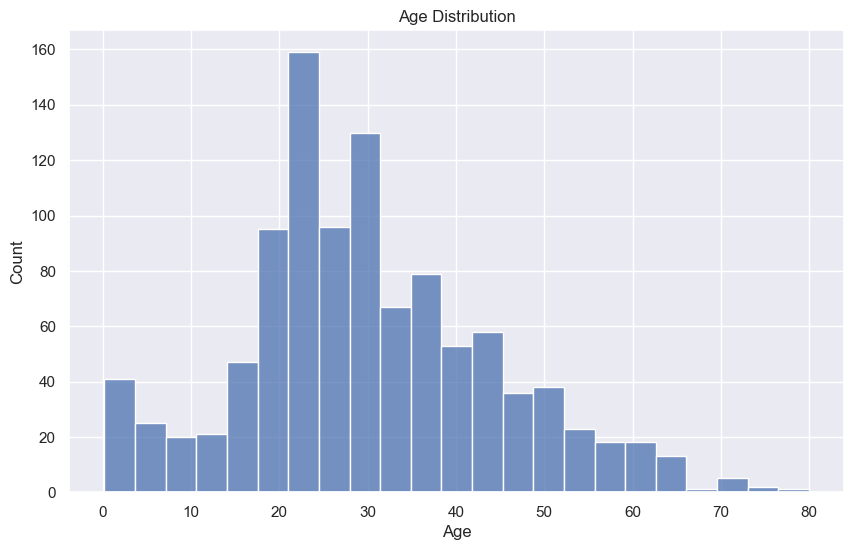


Box plot


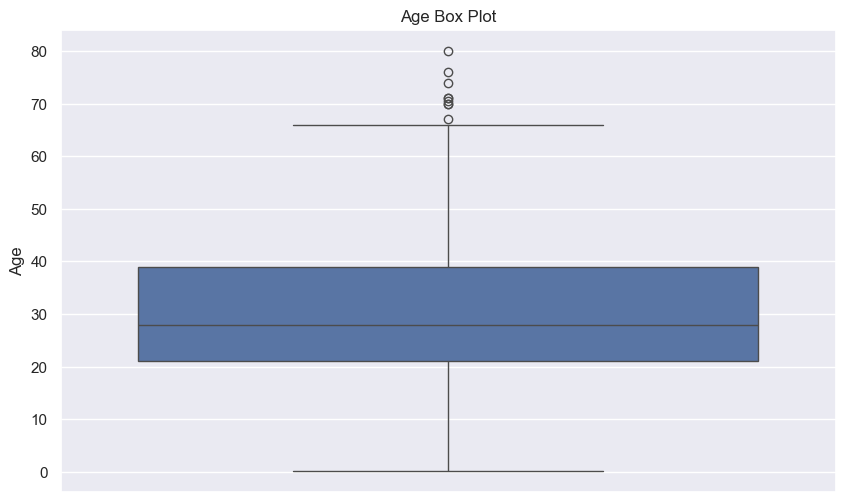

In [6]:
#Explore data distributions using histograms and box plots
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna())
plt.title('Age Distribution')
plt.show()

print("\nBox plot")
plt.figure(figsize=(10, 6))
sns.boxplot(df['Age'].dropna())
plt.title('Age Box Plot')
plt.show()


AGE vs SURVIVAL


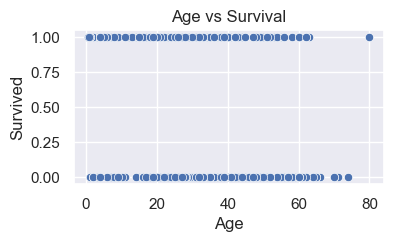


 SEX vs SURVIVAL


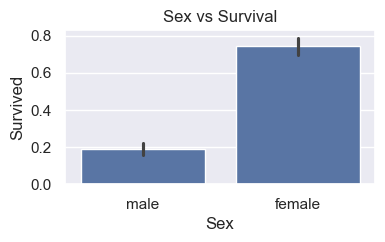

In [7]:
#Visualize relationships between features and survival using scatter plots and bar plots
print("AGE vs SURVIVAL")
plt.figure(figsize=(4,2))
sns.scatterplot(x='Age', y='Survived', data=df)
plt.title('Age vs Survival')
plt.show()

print("\n SEX vs SURVIVAL")
plt.figure(figsize=(4, 2))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Sex vs Survival')
plt.show()

# **Data Preprocessing**

In [9]:
#Handling missing values
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
survived        891
dtype: int64

In [10]:
#Separating numerical and categorical columsn from dataset
num_cols = [col for col in df.columns if df[col].dtype != 'O']
cat_cols = [col for col in df.columns if df[col].dtype == 'O']

In [11]:
from sklearn.impute import SimpleImputer

In [12]:
# Create a SimpleImputer for numerical columns
num_imputer = SimpleImputer(strategy='mean')

# Apply the SimpleImputer to numerical columns
df[num_cols] = num_imputer.fit_transform(df[num_cols])

In [13]:
# Create a SimpleImputer for categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent')

# Apply the SimpleImputer to categorical columns
if cat_cols:  # This ensures the code only runs if there are categorical columns
    df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])
else:
    print("No categorical columns found after initial processing.")


In [14]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
survived       0
dtype: int64

In [15]:
#Applying Encoding Techniques
from sklearn.preprocessing import LabelEncoder

#Apply the LabelEncoder to categorical columns
le = LabelEncoder()
df[cat_cols] = df[cat_cols].apply(le.fit_transform)

In [16]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,survived
0,1.0,0.000000,3.0,155,1,22.000000,1.0,0.0,720,7.2500,80,2,0.383838
1,2.0,1.000000,1.0,286,0,38.000000,1.0,0.0,816,71.2833,106,0,0.383838
2,3.0,1.000000,3.0,523,0,26.000000,0.0,0.0,914,7.9250,80,2,0.383838
3,4.0,1.000000,1.0,422,0,35.000000,1.0,0.0,65,53.1000,70,2,0.383838
4,5.0,0.000000,3.0,22,1,35.000000,0.0,0.0,649,8.0500,80,2,0.383838
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305.0,0.383838,3.0,1126,1,29.881138,0.0,0.0,711,8.0500,80,2,0.383838
1305,1306.0,0.383838,1.0,891,0,39.000000,0.0,0.0,834,108.9000,64,0,0.383838
1306,1307.0,0.383838,3.0,1046,1,38.500000,0.0,0.0,872,7.2500,80,2,0.383838
1307,1308.0,0.383838,3.0,1227,1,29.881138,0.0,0.0,579,8.0500,80,2,0.383838


# **Building Predictive Models**

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
X = df.drop(['Survived'], axis=1)
y = df['Survived']
y = y.astype(int) # Convert y to integer type to represent discrete classes

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
#Building LightGBM Model
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 269, number of negative: 778
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000516 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1141
[LightGBM] [Info] Number of data points in the train set: 1047, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.256925 -> initscore=-1.062015
[LightGBM] [Info] Start training from score -1.062015
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier()

In [21]:
y_pred_lgb = lgb_model.predict(X_test)

In [22]:
#evaluate the model
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
precision_lgb = precision_score(y_test, y_pred_lgb)
recall_lgb = recall_score(y_test, y_pred_lgb)
f1_lgb = f1_score(y_test, y_pred_lgb)

In [23]:
print("LightGBM Performance:")
print(f"Accuracy: {accuracy_lgb:.2f}")
print(f"Precision: {precision_lgb:.2f}")
print(f"Recall: {recall_lgb:.2f}")
print(f"F1 Score: {f1_lgb:.2f}")

LightGBM Performance:
Accuracy: 0.86
Precision: 0.78
Recall: 0.70
F1 Score: 0.74


In [24]:
#Building XGBoost Model
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [25]:
y_pred_xgb = xgb_model.predict(X_test)

In [26]:
# Evaluate XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

In [27]:
print("XGBoost Performance:")
print(f"Accuracy: {accuracy_xgb:.2f}")
print(f"Precision: {precision_xgb:.2f}")
print(f"Recall: {recall_xgb:.2f}")
print(f"F1 Score: {f1_xgb:.2f}")

XGBoost Performance:
Accuracy: 0.87
Precision: 0.76
Recall: 0.75
F1 Score: 0.76


# **Comparative Analysis**

In [62]:
#Comparing the model performance
print(" LightGBM Performance Results:")
print(f"Accuracy: {accuracy_lgb:.2f}")
print(f"Precision: {precision_lgb:.2f}")
print(f"Recall: {recall_lgb:.2f}")
print(f"F1 Score: {f1_lgb:.2f}")


print("\n XGBoost Performance Results:")
print(f"Accuracy: {accuracy_xgb:.2f}")
print(f"Precision: {precision_xgb:.2f}")
print(f"Recall: {recall_xgb:.2f}")
print(f"F1 Score: {f1_xgb:.2f}")

 LightGBM Performance Results:
Accuracy: 0.86
Precision: 0.78
Recall: 0.70
F1 Score: 0.74

 XGBoost Performance Results:
Accuracy: 0.87
Precision: 0.76
Recall: 0.75
F1 Score: 0.76


In [64]:
# Calculate ROC curve and AUC & Plot the ROC curves
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [66]:
 #Calculating ROC curve and AU

# LightGBM
lgb_probs = lgb_model.predict_proba(X_test)[:, 1]
lgb_fpr, lgb_tpr, _ = roc_curve(y_test, lgb_probs)
lgb_auc = auc(lgb_fpr, lgb_tpr)

In [72]:
lgb_auc

0.9252011306805827

In [68]:
# XGBoost
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
xgb_auc = auc(xgb_fpr, xgb_tpr)


In [74]:
xgb_auc

0.9179531782271508

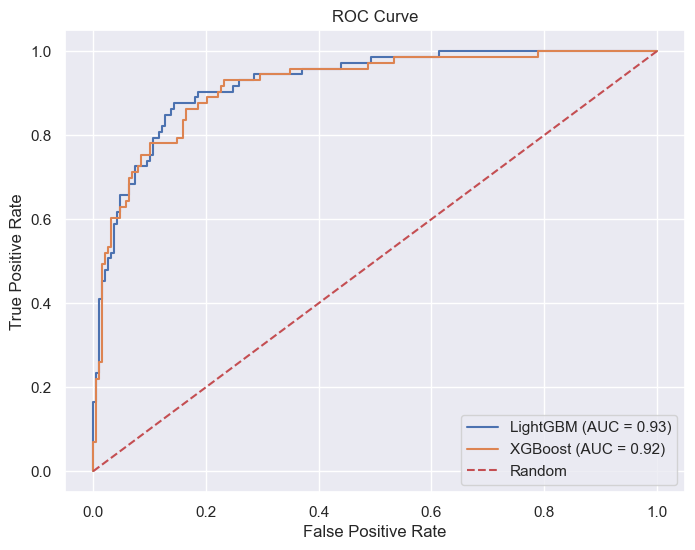

In [76]:
# Plot the curve
plt.figure(figsize=(8, 6))
plt.plot(lgb_fpr, lgb_tpr, label=f'LightGBM (AUC = {lgb_auc:.2f})')
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()